### Introduction Maths pour la Data Science


Ce notebook est un support de cours avec un TP intégré.

Je commencerai par charger une jeu de données. Nous l'utiliserons pour illustrer des concepts de stats/maths appliquées de base.

Nous utiliserons dans ce notebook la librairie, numpy, qui est celle de reference concernant le calcul scientifique (manipulation/operation vecteur matrice, outils statistiques ...) ainsi que pandas pour manipuler nos données.

Et nous verrons également deux librairies de visualisation matplotlib et seaborn



In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

### Analyse de la taille 

Le terme régression a été introduit par Sir Francis Galton (cousin de C. Darwin) au xixe siècle, alors qu'il étudiait la taille des individus au sein d'une descendance. Il tentait de comprendre pourquoi les grands individus d'une population semblaient avoir des enfants d'une taille plus petite, plus proche de la taille moyenne de la population; d'où l'introduction du terme "régression" (approcher une variable à partir d’autres qui lui sont corrélées).

*Le terme provient de la régression vers la moyenne observée par Sir Francis Galton : les enfants de personnes de grande taille avaient eux-mêmes une taille supérieure à celle de la population en moyenne, mais inférieure à celle de leurs parents (toujours en moyenne), sans que la dispersion de taille au sein de la population totale ne soit réduite pour autant*


Dans la suite on va s’intéresser aux données récoltées par Galton.

#### Lire dataset sous un format de type DataFrame (galton_dataset.csv)

Afficher les 5 premieres lgnes

Family  Father  Mother Gender  Height  Kids
0        1    78.5    67.0      M    73.2     4
1        1    78.5    67.0      F    69.2     4
2        1    78.5    67.0      F    69.0     4
3        1    78.5    67.0      F    69.0     4
4        2    75.5    66.5      M    73.5     4
..     ...     ...     ...    ...     ...   ...
893   136A    68.5    65.0      M    68.5     8
894   136A    68.5    65.0      M    67.7     8
895   136A    68.5    65.0      F    64.0     8
896   136A    68.5    65.0      F    63.5     8
897   136A    68.5    65.0      F    63.0     8

[898 rows x 6 columns]

#### Convertissez les colonnes ['Father', 'Mother', 'Height'] (inch) en cm et renommez la colonne "Height" par "Hkids"

Family  Father  Mother Gender   Height  Kids
0        1  199.39  170.18      M  185.928     4
1        1  199.39  170.18      F  175.768     4
2        1  199.39  170.18      F  175.260     4
3        1  199.39  170.18      F  175.260     4
4        2  191.77  168.91      M  186.690     4
..     ...     ...     ...    ...      ...   ...
893   136A  173.99  165.10      M  173.990     8
894   136A  173.99  165.10      M  171.958     8
895   136A  173.99  165.10      F  162.560     8
896   136A  173.99  165.10      F  161.290     8
897   136A  173.99  165.10      F  160.020     8

[898 rows x 6 columns]

#### Filtrer votre dataframe pour ne conserver que les garçons

Family  Father  Mother Gender   Height  Kids
0        1  199.39  170.18      M  185.928     4
4        2  191.77  168.91      M  186.690     4
5        2  191.77  168.91      M  184.150     4
8        3  190.50  162.56      M  180.340     2
10       4  190.50  162.56      M  179.070     5
..     ...     ...     ...    ...      ...   ...
890   136A  173.99  165.10      M  182.880     8
891   136A  173.99  165.10      M  179.070     8
892   136A  173.99  165.10      M  174.498     8
893   136A  173.99  165.10      M  173.990     8
894   136A  173.99  165.10      M  171.958     8

[465 rows x 6 columns]

#### Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les lignes ayant des données manquantes.

In [6]:
df.isna().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

#### Analysons la taille des mères et des pères 

Créer un DataFrame "peres" en partant du df initial et en ne conservant que les lignes où il n y a pas de lignes dupliquées sur les champs (Family,Father).

Family  Father  Mother Gender   Height  Kids
0        1  199.39  170.18      M  185.928     4
4        2  191.77  168.91      M  186.690     4
8        3  190.50  162.56      M  180.340     2
10       4  190.50  162.56      M  179.070     5
15       5  190.50  148.59      M  182.880     6
..     ...     ...     ...    ...      ...   ...
882    200  162.56  160.02      M  163.830     1
883    201  162.56  152.40      M  167.640     2
885    203  157.48  167.64      M  162.560     3
888    204  158.75  160.02      M  168.910     2
890   136A  173.99  165.10      M  182.880     8

[197 rows x 6 columns]

Créer un DataFrame "meres" de la meme façon.

In [8]:
meres=df.drop_duplicates(["Family","Mother"])
meres

Family  Father  Mother Gender   Height  Kids
0        1  199.39  170.18      M  185.928     4
4        2  191.77  168.91      M  186.690     4
8        3  190.50  162.56      M  180.340     2
10       4  190.50  162.56      M  179.070     5
15       5  190.50  148.59      M  182.880     6
..     ...     ...     ...    ...      ...   ...
882    200  162.56  160.02      M  163.830     1
883    201  162.56  152.40      M  167.640     2
885    203  157.48  167.64      M  162.560     3
888    204  158.75  160.02      M  168.910     2
890   136A  173.99  165.10      M  182.880     8

[197 rows x 6 columns]

### Rappel statistiques

<img src="img/moyenne.png" width="800">

<img src="img/mediane.png" width="800">

Creer une fonction (med) qui calcule la mediane (d'une serie ou liste, ...) en reprenant la defnition ci dessus

In [11]:
def med(l):
    n=len(l)
    # Classer la liste 
    l.sort()
    if len(l)%2 ==0:
        print(n,int(n/2)-1,int(n/2)+1)
        # Enlever une unité à l'index de la liste (car list[0]=1er element )
        m=(l[int(n/2)-1]+l[int(n/2)+1-1])/2
    else:
        # Enlever une unité à l'index de la liste (car list[0]=1er element )
        m=l[int((n+1)/2)-1]
    return m
    
    
med(list(peres['Father'])),peres['Father'].median()

(176.53, 176.53)

Trouver la taille moyenne de ces series de données (en utilisant pandas et numpy)

In [13]:
print('#######################  Moyenne peres et meres ##########################')



#######################  Moyenne peres et meres ##########################
Peres  Pandas 176.14706598984776 // Numpy : 176.14706598984776
Meres  Pandas 162.5200304568528 // Numpy : 162.5200304568528


Trouver la taille mediane de ces series de données (avec pandas et numpy)

In [14]:
print('#######################  Mediane peres et meres  ##########################')



#######################  Mediane peres et meres  ##########################
Peres  Pandas 176.53 // Numpy : 176.53
Meres  Pandas 162.56 // Numpy : 162.56


<img src="img/Moyenne vs mediane.png" width="800">

Calculer les ecarts types de chacune de ces series (np.std) où np =alias(numpy)

In [15]:
np.std(peres['Father']),np.std(meres['Mother'])

(6.643041819065913, 5.968036259185308)

<img src="img/Dispersion_variance_ecart_type.png" width="800">

#### Afficher sur un même graphe un estimateur de la densité de la population des pères et de celles des mère.

utilisez pour cela, kdeplot un estimateur de densité de la librairie seaborn

/home/david/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/david/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


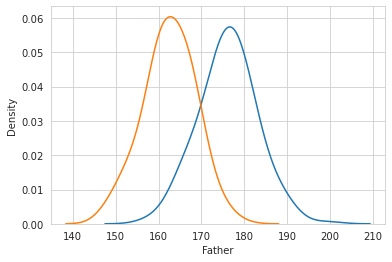

In [16]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(peres['Father'], bw=0.5)
sns.kdeplot(meres['Mother'], bw=0.5)
plt.show();

#### En reprenant le resultat des indicateurs precedemment calculés, expliquez  :
- Sommets des "clochees" (la postion (l'abscisse))
- L'"écartement" des cloches 

#### La dataviz nous permet également d'estimer un "taux de dispersion" 

La boite à moustache / box plot, permet de representer la distribution de la serie en enlevant les observations 
extremes (les plus faibles ou plus elevees), en moyene 1% des données.

Ci dessous cette representation en reprenant nos celle des peres

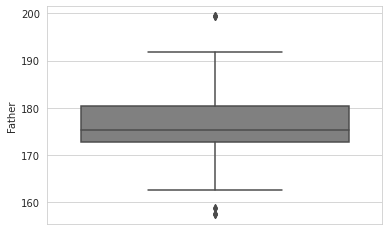

In [17]:
sns.set_style('whitegrid')
sns.boxplot( y = df['Father'],color=".5")
plt.show()

- La mediane est representée au centre de la box
- Le quartile inferieure est "inferieur" à 173 cm
- Le quartile superieur est "superieur" à 179 cm
- Dans cette boite il y a 50% des observations, elle "mesure" environ 6 cm
- Deux traits parralleles limitent cette figure (189 cm et 165 cm)

==> ils marquent les limites des observations utilisées pour le calcul des metrics (mediane et quartile sont calculés sur cet echantillon de points). Au delà il s'agit d'éléments considérés comme "outliers"
(On utilise 1.5*6=9 cm de limite haute et basse en partant des extremas de la box)

Tracer la meme representation mais pour la taille des meres

Avec l'aide de la methode .hist() associé aux objets de type Series, tracez la distribution en coupant l'axe des abscisses en 10 intervalles de meme "longueur"

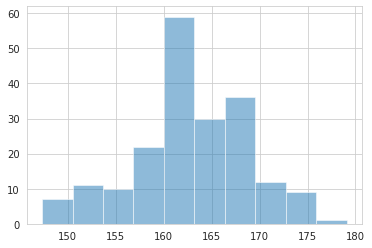

In [19]:
meres['Mother'].hist(bins=10,alpha=0.5);

Utilisez le parametre "bins" de la methode .hist() pour tracez la distribution en coupant l'axe des abscisses en 4 intervalles de meme "longueur"

#### Remarque: densité de la série

La densité visualisée plus haut (*Afficher sur un même graphe un estimateur de la densité de la population des pères et de celles des mère"*) correspond à un tracé (continu) interpolé des données (discretes). 

Utilisez la visualisation seaborn .distplot() pour observer ces deux tracés.

/home/david/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


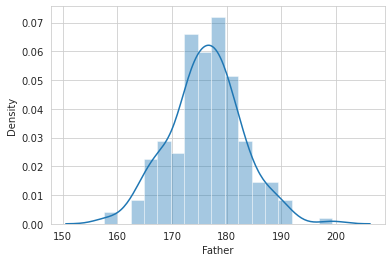

In [21]:
sns.distplot(peres['Father']);

#### Maintenant nous allons tracer une droite (créer un estimateur) interpolant la taille des enfants en fonction des variables explicatives (taille du pere et de la mere)

Pour comprendre sur ce jeu de données les correlations (dépendances ?) entre les colonnes (features), nous allons creer une matrice de correlation.

La corelation entre deux vecteurs/series permet d'identifier une dependance entre eux. Cette valeur, généralement [0,1] vaut 1 pour une dependace et 0 pour une independance. Cependant, les resultats sont le plus souvent des nombres decimaux situés dans cette intervalle.


#### Pearson correlation coefficient

Forme générale : 
<img src="img/f76ccfa7c2ed7f5b085115086107bbe25d329cec.svg" width="200">

Forme discrete :
<img src="img/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f.svg" width="250">



Elle nous donne une information sur le rapprochement de deux features (les vecteurs que nous avons analysés)

Tracez une representation similaire.

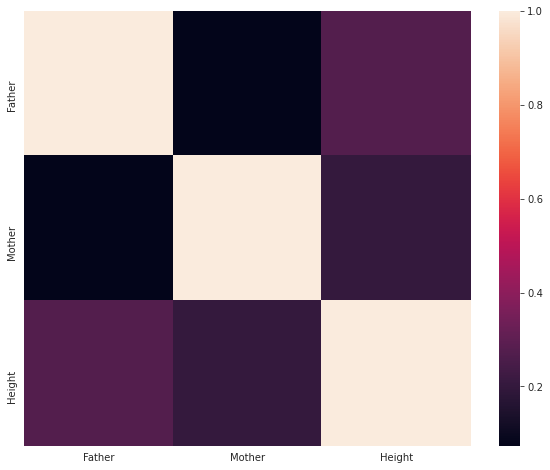

In [23]:
plt.subplots(figsize=(10, 8))
corr = df[['Father','Mother','Height']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Utilisez la methode pandas .corr() pour afficher la valeur des coefficients de correlation entre ces colonnes

Father    Mother    Height
Father  1.000000  0.073665  0.275355
Mother  0.073665  1.000000  0.201655
Height  0.275355  0.201655  1.000000

Quelles informations (relations entre features) pourriez vous tirer de cette representation ?

Verifier cela en traçant l'évolution de la taille des enfants en fonction de la mere, puis du pere

nb: Tracer la droite d'equation y=x sur cette representation de point pour evaluer le potentiel de cette regression :

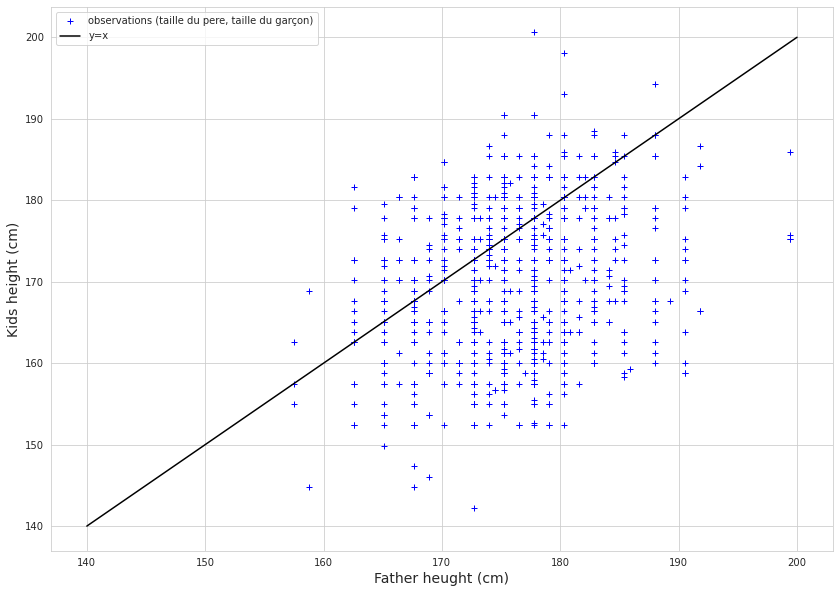

In [32]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Father'],df['Height'],'+',c='blue',label='observations (taille du pere, taille du garçon)')
plt.plot([140,200],[140,200],c='black',label='y=x')


plt.xlabel('Father heught (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

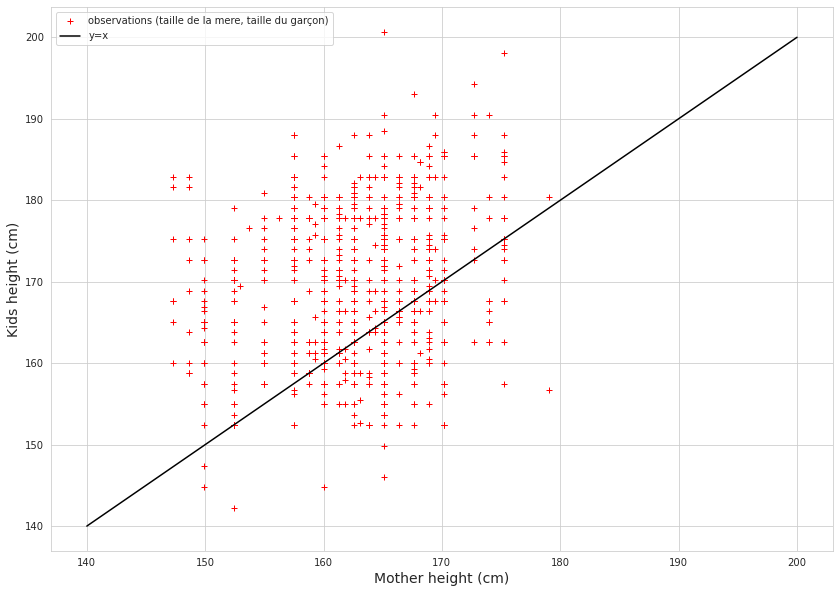

In [34]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Mother'],df['Height'],'+',c='red',label='observations (taille de la mere, taille du garçon)')
plt.plot([140,200],[140,200],c='black',label='y=x')

plt.xlabel('Mother height (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

Il y a, comment dire, un sacré "biais" entre l'évolution f(taille de la mere)=taille du garçon et la droite y=x

En ajoutant une droite d'equation y=x sur les precedents schéma, nous remarquons que nous pourrions construire une droite y=ax+b.

a : Le coefficient directeur deviendrait un coef de corrélation de la taille d'un des parents sur celle de leurs enfants

b: l'ordonnée à l'origine deviendrait un biais que nous modifierons pour recentrer les valeurs ainsi prédites


L'objectif étant de trouver les coefficients de notre fonction capables de minimiser les ecarts entre la prediction (la droite) et l'observation (les points)


Le modèle linéaire peut être estimé par la méthode des moindres carrés. Très populaire elle est très souvent présentée avec le modèle linéaire.

<img src="img/Estimateur_des_moindres_carres.png" width="800">

Effectuer une régression linéaire au sens des moindres carrés, c'est trouver la droite qui minimise l'écart
y-ŷ (cf schema), c'est-à-dire la somme des carrés des différences : on parle de droite des moindres carrés.

<img src="img/reglin1.png" width="200">

Mais pour l'instant, restons sur un exercice intuitif de creation de model.

Ci dessous notre premier estimateur (y=ax+b) de la taille du garçon en fonction de la taille du pere

In [56]:
def pred_p(coef,hp,b):
    return (coef*hp)+b

# coeffs
coef=0.96
taille_pere=180
# Posons le biais à  0
biais=0
pred_p(coef,taille_pere,biais)

172.79999999999998

D'apres les donnees nous pouvons trouver une  moyenne d'une catégorie d'enfant dont le pere mesure 180 cm.

In [46]:
df.round().groupby(["Father"])['Height'].mean()

Father
157.0    158.333333
159.0    157.000000
163.0    164.823529
165.0    165.000000
166.0    171.000000
168.0    165.491228
169.0    163.714286
170.0    170.125000
171.0    166.812500
173.0    166.579439
174.0    170.717949
175.0    170.304348
176.0    169.250000
177.0    169.962963
178.0    170.038168
179.0    170.487805
180.0    172.011236
181.0    167.500000
182.0    173.875000
183.0    173.309524
184.0    171.666667
185.0    173.967742
186.0    159.000000
188.0    174.500000
189.0    168.000000
190.0    170.615385
192.0    175.750000
199.0    178.000000
Name: Height, dtype: float64

Ajustons le biais pour tendre vers cette valeur

In [60]:
# coeff de corelation 
coef=0.3
taille_pere=180
biais=118

pred_p(coef,180,biais)

172.0

Conservons les resultats de l'estimateur et representaons les resultats estimateurs et données reeles

In [62]:
x=df.groupby(["Father"])['Height'].median().index
est_p=[pred_p(coef,elem,biais) for elem in df.groupby(["Father"])['Height'].mean().index]

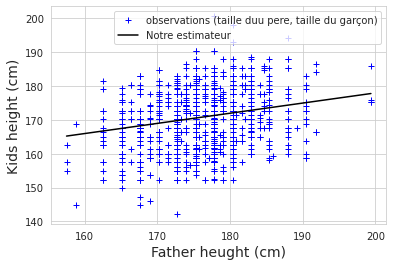

In [63]:
fig = plt.figure()
plt.plot(df['Father'],df['Height'],'+',c='blue',label='observations (taille duu pere, taille du garçon)')

plt.plot(x,est_p,c='black',label='Notre estimateur')
plt.xlabel('Father heught (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

#### Ameliorer notre predicteur en jouant sur le coefficient directeur et l'ordonnée à l'origine

Et tracer cette nouvelle representation

Pour évaluer l'ecart entre notre estimateur et les données, nous allons construire un outil qui permet de le quantifier.

Le RMSE (Root Mean Squared Error) <=> La racine de la moyenne des erreurs au carré ...

In [65]:
import math

math.sqrt(((df.groupby(["Father"])['Height'].mean().values-pd.Series(est_p))**2).mean())

4.671692449761858

#### Nous aurions pu trouver directement les meilleurs coefficients pour notre estimateur

Reprenons la methode des moindres carrés :

Effectuer une régression linéaire au sens des moindres carrés, c'est trouver la droite qui minimise l'écart
y-ŷ (cf schema), c'est-à-dire la somme des carrés des différences : on parle de droite des moindres carrés.

<img src="img/reglin1.png" width="300">

Il s'agit donc de minimiser J 


<img src="img/reglin3.png" width="300">

Pouvez vous me trouver les meilleurs coefficients a et b, en continuant cet exercice de minimisation ? 

<img src="img/reglin4.png" width="300">

Vous concluerez en calculant le RMSE sur ce nouvel estimateur.

#### Refaite le meme exercice pour trouver un estimateur de la taille d'un garçon connaissant la taille de sa mère.

Vous concluerez en calculant le RMSE sur ce nouvel estimateur

#### La généralisation de ces calculs dans un espace à plusieurs dimensions (plusieurs variables, ...) , nous pousse à utiliser des concepts abstraits mais plus universels



    1- Algèbre bilinéaire – Produit scalaire 
   

    2- Algèbre bilinéaire – Espaces euclidiens 
  

    3- Algèbre bilinéaire – Endomorphismes symétriques d’un espace euclidien, matrices symétrique 
   

    4- Projection orthogonale 


    5- Réduction des endomorphismes et des matrices symétriques 
   
    
